# Basic Py-ART

---
## What is Py-ART?

The Python ARM Radar Toolkit or Py-ART:

* Py-ART is a Python module for plotting, correcting and analyzing weather radar data.
* Developement began to address the needs of ARM with the acquisition of a number of new scanning cloud and precipitation radar as part of the American Recovery Act.
* The project has since expanded to work with a variery of weather radars and a wider user base including radar researchers and climate modelers.
* The software has been [released on GitHub](https://github.com/ARM-DOE/pyart) as open source software under a BSD license.
* Runs on Linux, OS X and Windows.
* Contributions from others are always welcome.

---
## What can Py-ART do?

Py-ART can be used for a variety of tasks  from basic plotting to more complex processing pipelines.  Specific uses for Py-ART include:

* Reading radar data in a variety of file formats.
* Creating plots and visualization of radar data.
* Correcting radar moments while in antenna coordinates.
    * Doppler unfolding/de-aliasing.
    * Attenuation correction.
    * Phase processing using a Linear Programming method.
* Mapping data from one or multiple radars onto a Cartesian grid.
* Performing retrivals on this mapped data or on the original radial data.
* Writing radial and Cartesian data to NetCDF files.

We will be covering some of these topics in the course.

---
## What Py-ART is not.

* Py-ART is **NOT** a real-time operations radar system.  Other software does a much better job at this.
* Py-ART is not designed to be fast or memory efficient.
    * Although some of our routines have been heavily optimized.
* Py-ART does not have all the latest and greatest correction and retrival algorithms.
    * But we would be happy to help you add your favorite.
* Py-ART is not the only open source radar software out there.
    * [wradlib](http://wradlib.bitbucket.org/) : Open Source Library for   Weather Radar Data Processing.
    * [BALTRAD](http://baltrad.eu/) : Software running a real time  operations radar network. 
    * [RadX](http://www.ral.ucar.edu/projects/titan/docs/radial_formats/radx.html) : NCAR software for converting between radar data formats. 
    * [TRMM Radar Software Library (RSL)](http://trmm-fc.gsfc.nasa.gov/trmm_gv/software/rsl/) : Library from NASA for open-oriented access to Radar files in C. 
    * We are collaborating with a number of these packages.

---
## Py-ART essentials links

* Landing page, [arm-doe.github.io/pyart/](http://arm-doe.github.io/pyart/)
* Documentation, [arm-doe.github.io/pyart-docs-travis/](http://arm-doe.github.io/pyart-docs-travis/)
* Examples, [arm-doe.github.io/pyart/dev/auto_examples/index.html](http://arm-doe.github.io/pyart/dev/auto_examples/index.html)
* Source Code, [github.com/ARM-DOE/pyart](https://github.com/ARM-DOE/pyart)
* Mailing list, [groups.google.com/group/pyart-users/](http://groups.google.com/group/pyart-users/)
* Issue Tracker, [github.com/ARM-DOE/pyart/issues](https://github.com/ARM-DOE/pyart/issues)

---
Enough introduction, lets look at some radar data!

First, we need to import Py-ART, matplotlib and numpy. This allows us to use the included routines to read in data from radar files.

_Use shift+enter to execute the cell_

In [79]:
from matplotlib import pyplot as plt
import pyart
import numpy as np
%matplotlib inline

To begin we will be examining a [Mt Stapylton Radar](http://www.bom.gov.au/products/IDR663.loop.shtml) radar volume from the [27 November 2014](http://www.abc.net.au/news/2014-11-27/photos-show-full-scale-of-destructive-brisbane-storm/5923606) Brisbane hailstorm.  This file is formatted to meet the [odimh5](http://www.eumetnet.eu/sites/default/files/OPERA2014_O4_ODIM_H5_v2.2.pdf) file format specification. To convert Australian radar data in the rapic format to odimh5, use the rapic and odimh5 utilities from the [bom-radar](https://github.com/bom-radar) github page. The odimh5 name name convention is ID_yyyymmdd_HHMMSS (UTC)

<img class="logo" src="http://www.abc.net.au/news/image/5925502-3x2-940x627.jpg" width="500" align='left'/>

In [50]:
radar = pyart.aux_io.read_odim_h5('data/66_20141127_063032.h5', file_field_names=True)

We have just created a [**Radar**](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.html#pyart.core.Radar) instance which is the class Py-ART uses to store and process radar volume data.  We will discuss this class in detail later.

---

To access help for a function, we can call use the help()


In [51]:
help(pyart.aux_io.read_odim_h5)

Help on function read_odim_h5 in module pyart.aux_io.odim_h5:

read_odim_h5(filename, field_names=None, additional_metadata=None, file_field_names=False, exclude_fields=None, **kwargs)
    Read a ODIM_H5 file.
    
    Parameters
    ----------
    filename : str
        Name of the ODIM_H5 file to read.
    field_names : dict, optional
        Dictionary mapping ODIM_H5 field names to radar field names. If a
        data type found in the file does not appear in this dictionary or has
        a value of None it will not be placed in the radar.fields dictionary.
        A value of None, the default, will use the mapping defined in the
        Py-ART configuration file.
    additional_metadata : dict of dicts, optional
        Dictionary of dictionaries to retrieve metadata from during this read.
        This metadata is not used during any successive file reads unless
        explicitly included.  A value of None, the default, will not
        introduct any addition metadata and the fi

---

For now use the [`info`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.core.Radar.extract_sweeps.html#pyart.core.Radar.extract_sweeps) method to describe the data in the odimh5 file we have just read. 

In [52]:
radar.info('compact')
# try out 'standard' or 'full' also

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (5040,)>
elevation: <ndarray of type: float64 and shape: (5040,)>
fields:
	VRADH: <ndarray of type: float32 and shape: (5040, 600)>
	DBZH: <ndarray of type: float32 and shape: (5040, 600)>
fixed_angle: <ndarray of type: float32 and shape: (14,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 14
ngates: 600
nrays: 5040
radar_calibration: None
range: <ndarray of type: float32 and shape: (600,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (14,)>
sweep_mode: <ndarray of type: |S20 and shape: (14,)>
sweep_number: <ndarray of type: int32 and shape: (14,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (14,)>
target_scan_rate: None
time: <ndarray of type: float32 and shape: (5040,)>
metadata:
	comment: 


---
From this listing we see that the file contains a volume consisting of 14 Plan Position Indicator or PPI scans with two fields:

* Reflectivity (DBZH)
* Doppler Velocity (VRADH)

We can verify this by examining the `scan_type` attribute of the class.

In [53]:
radar.scan_type

'ppi'

Let's check what elevation angles these PPI scans were collected at

In [54]:
radar.fixed_angle['data']

array([  0.5       ,   0.89999998,   1.29999995,   1.79999995,
         2.4000001 ,   3.0999999 ,   4.19999981,   5.5999999 ,
         7.4000001 ,  10.        ,  13.30000019,  17.89999962,
        23.89999962,  32.        ], dtype=float32)

Let's add some additional information data fields in to the radar class

In [55]:
radar.fields['DBZH']['standard_name'] = 'Reflectivity'
radar.fields['DBZH']['units'] = 'dBZ'
radar.fields['DBZH']['long_name'] = 'Radar Reflectivity Factor'
radar.fields['VRADH']['standard_name'] = 'Velocity'
radar.fields['VRADH']['units'] = 'm/s'
radar.fields['VRADH']['long_name'] = 'Radial Velocity of Scatterers'

Let's use Py-ART's [**RadarMapDisplay**](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.RadarMapDisplay.html#pyart.graph.RadarMapDisplay) class to plot these fields.

In [56]:
display = pyart.graph.RadarMapDisplay(radar)

The display variable is an instance of the **RadarMapDisplay** class.  We can  use the `plot_ppi_map` method of this class to visualize the reflectivity data over a basic map from the second sweep in the odimh5 radar volume.

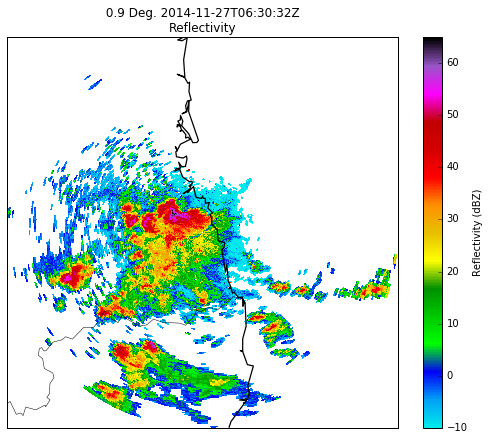

In [57]:
fig = plt.figure(figsize=[9, 7])

display.plot_ppi_map('DBZH', sweep=1,
             vmin=-10, vmax=65, cmap='pyart_NWSRef', resolution = 'i')

Zooming in on an interesting region of this plot and adding gridlines can be accomplished using the [`plot_ppi_map`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.RadarMapDisplay.plot_ppi_map.html#pyart.graph.RadarMapDisplay.plot_ppi_map) varibles and adding a location using [`plot_point`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.graph.RadarMapDisplay.plot_point.html#pyart.graph.RadarMapDisplay.plot_point)

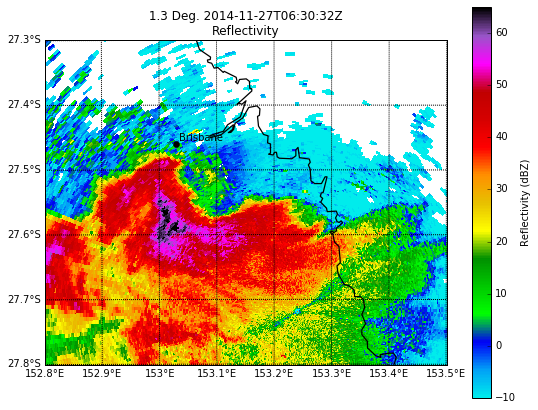

In [76]:
fig = plt.figure(figsize=[9, 7])

display.plot_ppi_map('DBZH', sweep=2, 
             vmin=-10, vmax=65, cmap='pyart_NWSRef', resolution = 'h',
             max_lat = -27.3, min_lat =-27.8, min_lon = 152.8, max_lon = 153.5,
             lat_lines = np.arange(-28,-26,.1), lon_lines = np.arange(152, 154, .1))

display.plot_point( 153.03, -27.46,
               label_text = 'Brisbane', 
               label_offset=[.005,.005], symbol = 'ko' )


---
Plotting the other radar moments is done in the same manner.  Feel free to adjust the luminosity limits by chaning vmin or vmax to your liking and try out other colormaps.

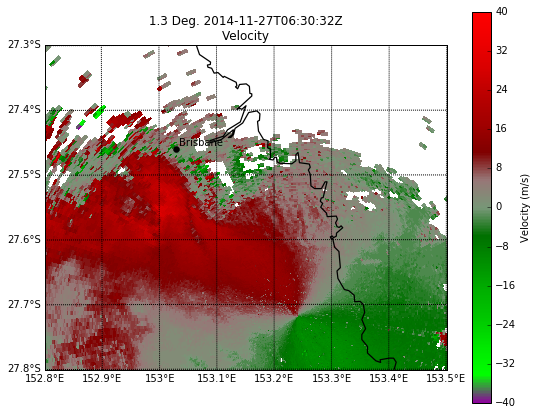

In [77]:
fig = plt.figure(figsize=[9, 7])

display.plot_ppi_map('VRADH', sweep=2, 
             vmin=-40, vmax=40, cmap='pyart_NWSVel', resolution = 'h',
             max_lat = -27.3, min_lat =-27.8, min_lon = 152.8, max_lon = 153.5,
             lat_lines = np.arange(-28,-26,.1), lon_lines = np.arange(152, 154, .1))

display.plot_point( 153.03, -27.46,
               label_text = 'Brisbane', 
               label_offset=[.005,.005], symbol = 'ko' )

## Writing out files

Py-ART can write out as NetCDF files which follow the Cf/Radial convention using the [`pyart.io.write_cfradial`](http://arm-doe.github.io/pyart-docs-travis/user_reference/generated/pyart.io.write_cfradial.html#pyart.io.write_cfradial) function. This is useful for when you apply filtering and corrections using py-art. Cf/Radial files can also be read back into py-art.

In [64]:
pyart.io.write_cfradial('modified_radar_dataset.nc', radar)
new_radar = pyart.io.read('modified_radar_dataset.nc')